<a href="https://colab.research.google.com/github/ngotancuong/mse.dip/blob/main/L8_6GrayLevel_Dilation_Erosion.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

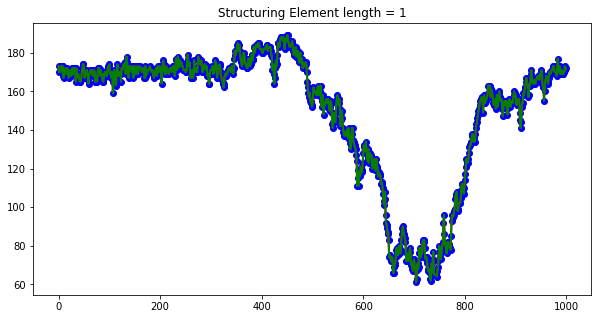

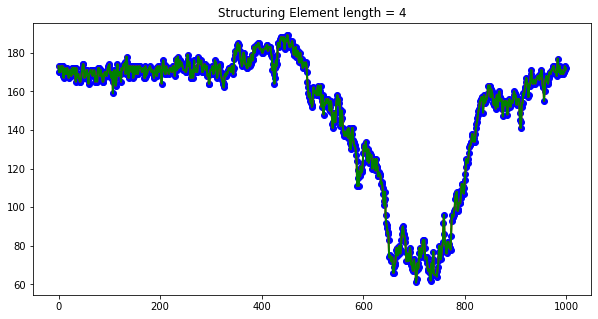

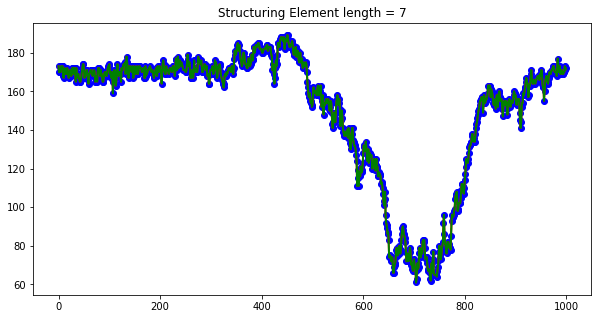

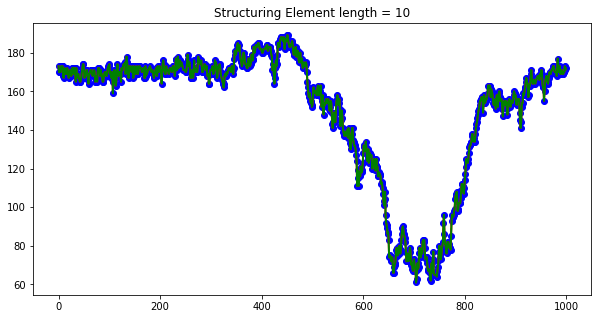

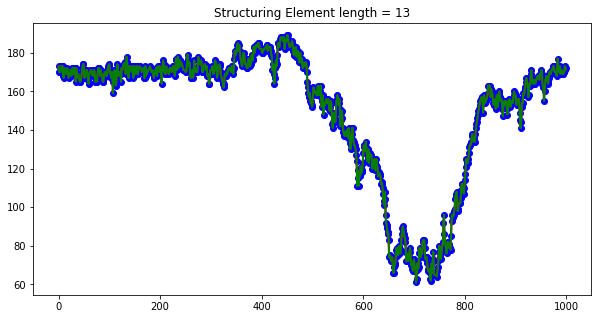

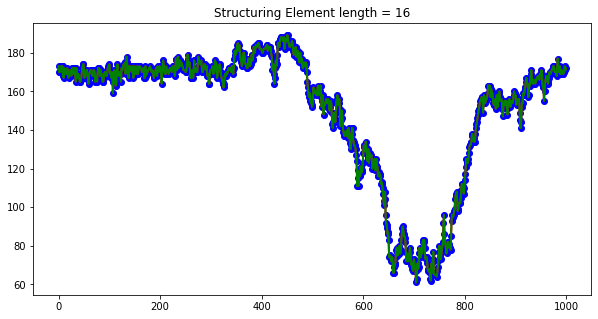

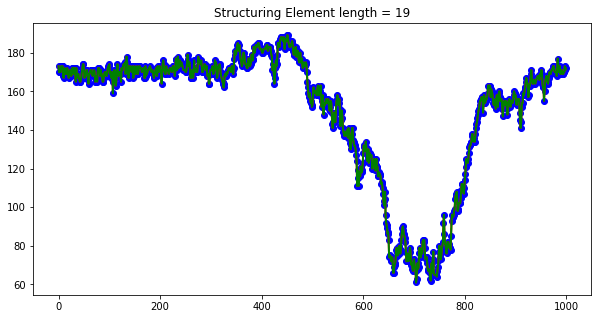

In [1]:
import urllib.request
import cv2
import numpy as np
import matplotlib.pyplot as plt

# load image from URL
url = 'https://raw.githubusercontent.com/ngotancuong/mse.dip/main/images/portrait.jpg'
resp = urllib.request.urlopen(url)
img = np.asarray(bytearray(resp.read()), dtype="uint8")
img = cv2.imdecode(img, cv2.IMREAD_COLOR)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
gray_img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

# choose any column of the image as 1-d sample
originalColumn = gray_img[100:1100, 1000]

# loop over different structuring elements (i.e., line)
for len in range(1, 22, 3):
    se = cv2.getStructuringElement(cv2.MORPH_RECT, (len, 1))
    dilated_col = cv2.dilate(originalColumn, se)
    eroded_col = cv2.erode(originalColumn, se)

    plt.figure(figsize=(10, 5))
    plt.plot(originalColumn, 'bo')
    plt.plot(originalColumn, 'b--')
    plt.plot(dilated_col, 'r', linewidth=2)
    plt.plot(eroded_col, 'g', linewidth=2)
    plt.title('Structuring Element length = {}'.format(len))
    plt.savefig('1D_Dilation_Erosion_{}.png'.format(len))
    plt.show()
